In [2]:
import re

import pandas as pd

import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

import math

import nltk

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

from collections import defaultdict

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud



C:\Users\Nivedita\AppData\Local\Temp\ipykernel_22600\2292278340.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nivedita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_csv('C:\\Users\\Nivedita\\Downloads\\linkedin-reviews(1).csv')

In [4]:
data

,review,sentiment
0,Does absolutely nothing for a LinkedIn beginne...,negative
1,Force close(galaxy tab),negative
2,Slow and it tries to upload your contacts with...,negative
3,Add ability to customize the profile and move ...,positive
4,"Good app, but it's a pain that it's not possib...",positive
...,...,...
697,"Can't trust, Going to uninstall just for that ...",negative
698,It really gets me linked in with my friends. H...,positive
699,It lacks most of what makes the other social n...,positive
700,Really disappointed in the new version. Seems ...,negative


In [5]:
def remove_tags(string):
    # Remove HTML tags
    result = BeautifulSoup(string, "html.parser").get_text()
    # Remove URLs
    result = re.sub(r'https?://\S+', '', result)
    # Remove non-alphanumeric characters
    result = re.sub(r'\W', ' ', result)
    result = result.lower()
    return result
data['review']=data['review'].apply(lambda cw : remove_tags(cw)) 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

C:\Users\Nivedita\AppData\Local\Temp\ipykernel_22600\382177901.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  result = BeautifulSoup(string, "html.parser").get_text()
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nivedita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['review'] = data.review.apply(lemmatize_text)

In [7]:
data

,review,sentiment
0,absolutely nothing linkedin beginner force clo...,negative
1,force close galaxy tab,negative
2,slow try upload contact without asking wtf,negative
3,add ability customize profile move sd card app...,positive
4,good app pain possible see sent message kind c...,positive
...,...,...
697,trust going uninstall reason,negative
698,really get linked friend haha get linked lol,positive
699,lack make social networking apps android great,positive
700,really disappointed new version seems focused ...,negative


In [8]:


# Load the CSV file
data = pd.read_csv('C:\\Users\\Nivedita\\Downloads\\linkedin-reviews(1).csv')  # Replace 'your_file.csv' with the path to your CSV file

# Assuming the column containing sentiment labels is named 'sentiment'
# Replace 'sentiment' with the actual name of your column
labels_column = data['sentiment']

# Count the occurrences of each label
label_counts = labels_column.value_counts()

print("Label Counts:")
print(label_counts)


Label Counts:
sentiment
negative    485
positive    217
Name: count, dtype: int64


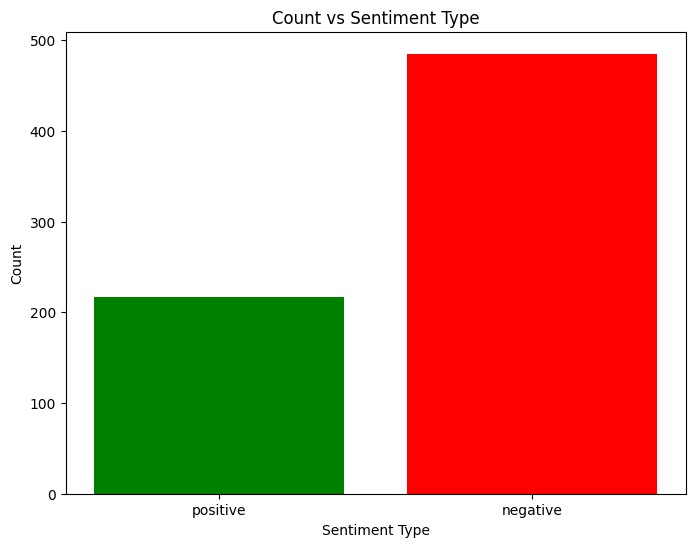

In [10]:

# Assuming you have already calculated the label counts
# Let's assume label_counts is a dictionary containing counts of each sentiment type
# Replace this with your actual counts
label_counts = {'positive': 217, 'negative': 485}  # Example counts

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(label_counts.keys(), label_counts.values(), color=['green', 'red'])
plt.title('Count vs Sentiment Type')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()


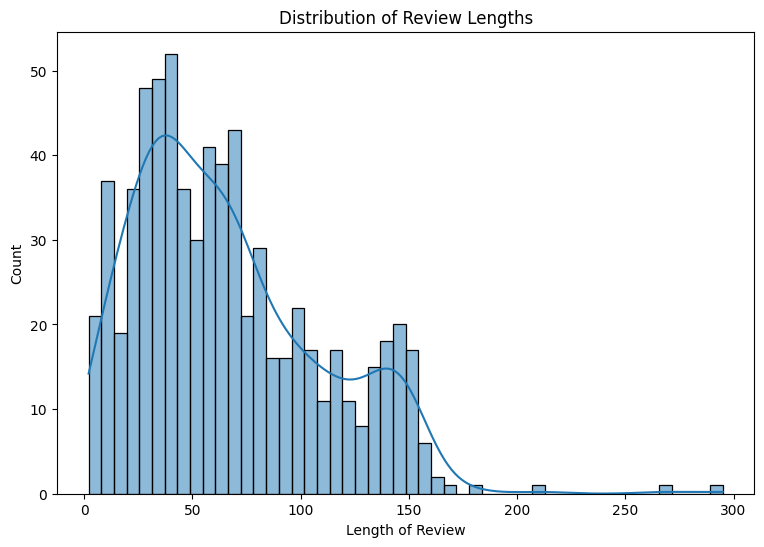

In [11]:
data = pd.read_csv('C:\\Users\\Nivedita\\Downloads\\linkedin-reviews(1).csv')

data['Review Length'] = data['review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

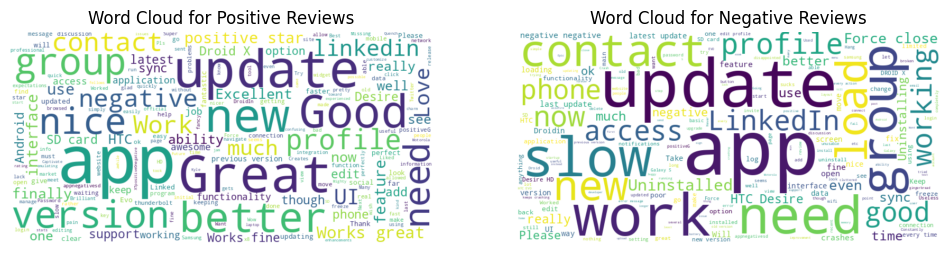

In [12]:

# Combine all positive and negative reviews
positive_reviews = ' '.join(data[data['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(data[data['sentiment'] == 'negative']['review'])

# Generate word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plotting word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()


In [13]:
reviews = data['review'].values
labels = data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [14]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [15]:
vec = CountVectorizer(max_features = 3000)
X = vec.fit_transform(train_sentences)
vocab = vec.get_feature_names_out()
X = X.toarray()
word_counts = {}
for l in range(2):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = train_labels[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]

In [16]:
def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)

In [17]:
def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data

def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = math.log(n_label_items[l] / n)
    return n_label_items, log_label_priors

In [18]:
def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result

Accuracy of prediction on test set :  0.7159090909090909


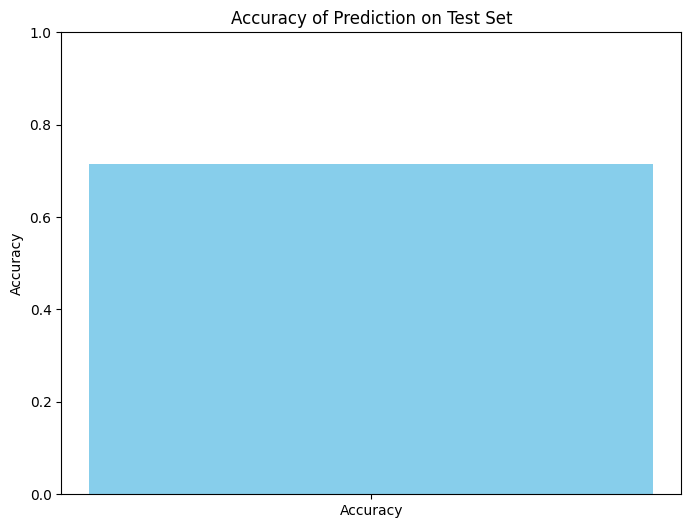

In [19]:
labels = [0,1]
n_label_items, log_label_priors = fit(train_sentences,train_labels,labels)
pred = predict(n_label_items, vocab, word_counts, log_label_priors, labels, test_sentences)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))

plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy_score(test_labels,pred)], color='skyblue')
plt.title('Accuracy of Prediction on Test Set')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Setting y-axis limits to range between 0 and 1
plt.show()

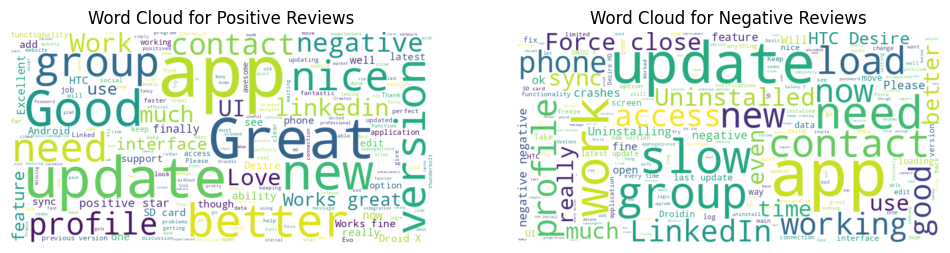

In [20]:
# Combine all positive and negative reviews
positive_reviews = ' '.join(data[data['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(data[data['sentiment'] == 'negative']['review'])

# Generate word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plotting word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()

In [21]:
def preprocess_text(text):
    # Preprocess the text (remove HTML tags, URLs, non-alphanumeric characters, stopwords, and lemmatization)
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r'https?://\S+', '', text)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert text to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(text)])  # Lemmatization
    return text


In [22]:

def predict_sentiment(review):
    # Preprocess the review
    preprocessed_review = preprocess_text(review)
    # Vectorize the preprocessed review
    review_vector = vec.transform([preprocessed_review])
    # Compute log-likelihood of each sentiment class given the review
    label_scores = {l: log_label_priors[l] for l in labels}
    for word in set(w_tokenizer.tokenize(preprocessed_review)):
        if word not in vocab:
            continue
        for l in labels:
            log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
            label_scores[l] += log_w_given_l
    # Predict the sentiment (positive or negative)
    predicted_sentiment = max(label_scores, key=label_scores.get)
    return "positive" if predicted_sentiment == 1 else "negative"


In [25]:

# Load the testing dataset containing only reviews
def load_test_dataset(file_path):
    # Read the dataset
    test_data = pd.read_csv(file_path)
    # Extract reviews
    test_reviews = test_data['review_text'].tolist()
    return test_reviews

In [26]:

# Example usage:
test_dataset_file_path = 'C:\\Users\\Nivedita\\Downloads\\archive(3)\\IMDB Dataset.csv'
test_reviews = load_test_dataset(test_dataset_file_path)

predicted_sentiments = []
for review in test_reviews:
    predicted_sentiment = predict_sentiment(review)
    predicted_sentiments.append(predicted_sentiment)


C:\Users\Nivedita\AppData\Local\Temp\ipykernel_22600\3529292716.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


In [54]:

# Print predicted sentiments
for review, sentiment in zip(test_reviews, predicted_sentiments):
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

